In [29]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator
import seaborn as sns

In [31]:
# Lendo os dados do arquivo CSV
df = pd.read_csv("Wholesale customers data.csv")

# Visualizando as primeiras linhas
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [32]:
df = df.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
# Escalar os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

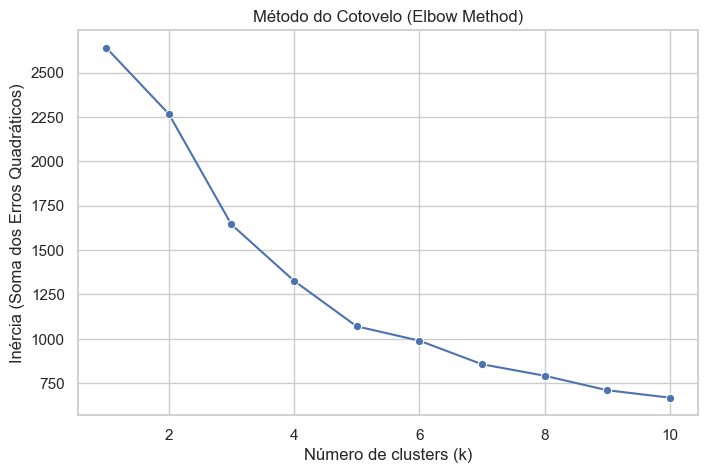

In [34]:
# Método do Cotovelo (Elbow Method)
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=sse, marker='o')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
plt.show()

O cotovelo sugerido pelo KneeLocator está em k = 5


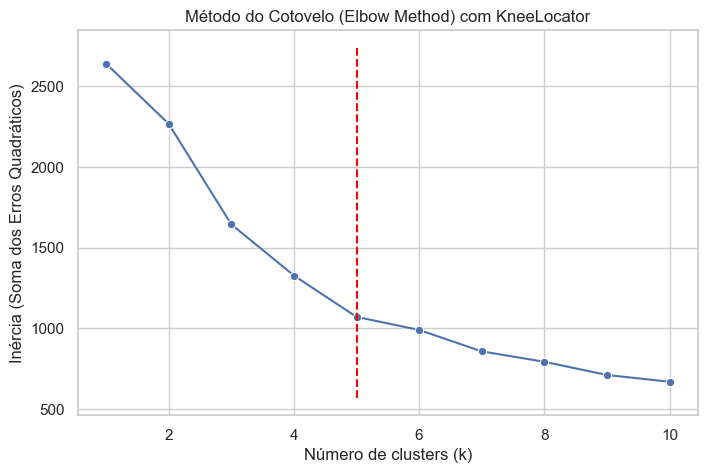

In [35]:
# Método do Cotovelo (Elbow Method)
from kneed import KneeLocator  # Importa o KneeLocator

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# KneeLocator para encontrar o cotovelo automaticamente
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print(f'O cotovelo sugerido pelo KneeLocator está em k = {kl.elbow}')

# Gráfico com Seaborn + KneeLocator
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=sse, marker='o')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.title('Método do Cotovelo (Elbow Method) com KneeLocator')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
plt.show()


In [39]:
model = KMeans(n_clusters=kl.elbow, random_state=42)
model.fit(df_scaled)
groups = model.predict(df_scaled)

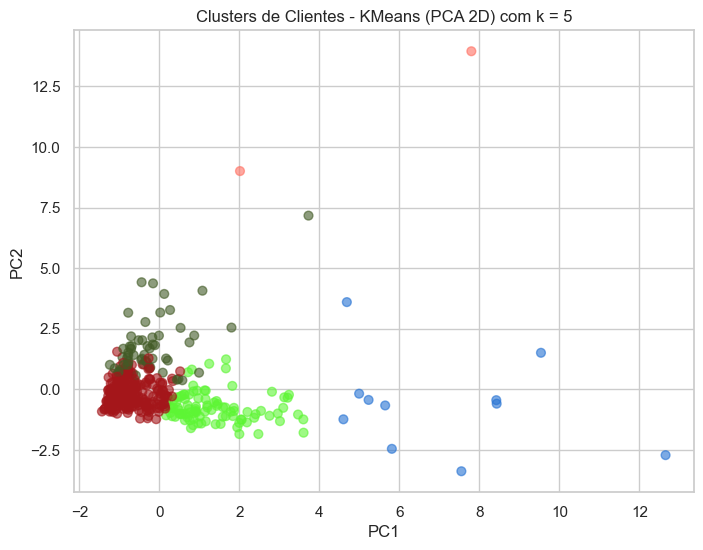

In [40]:
# PCA 2D
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_array, columns=['PC1', 'PC2'])
df_pca['group'] = groups

# Ajuste das cores para 5 clusters
colors = ['#5DF534', '#425B26', '#2572D3', '#A4161A', '#FF6F61']
df_pca['color'] = df_pca['group'].map({i: colors[i] for i in range(kl.elbow)})

plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['color'], alpha=0.6, s=40)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clusters de Clientes - KMeans (PCA 2D) com k = {kl.elbow}')
plt.show()

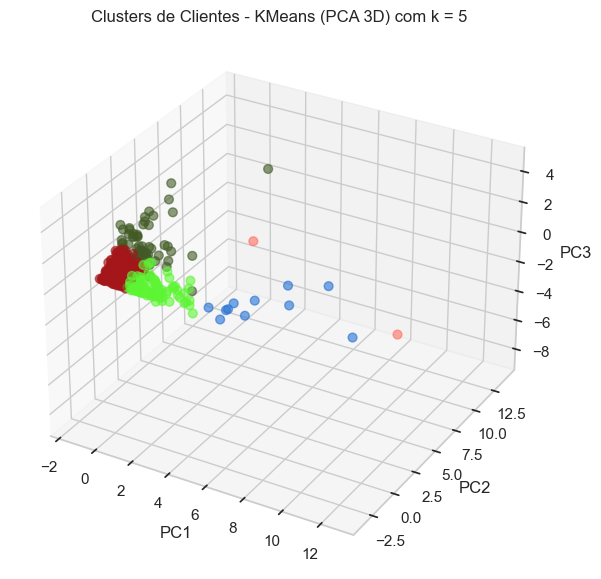

In [ ]:
# PCA 3D

pca = PCA(n_components=3)
pca_array_3d = pca.fit_transform(df_scaled)
df_pca_3d = pd.DataFrame(data=pca_array_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['group'] = groups
df_pca_3d['color'] = df_pca_3d['group'].map({i: colors[i] for i in range(kl.elbow)})

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], 
           c=df_pca_3d['color'], alpha=0.6, s=40)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'Clusters de Clientes - KMeans (PCA 3D) com k = {kl.elbow}')
plt.show()